# Looking for supermassive black hole binaries in CRTS data
#### Francisca Carrasco Chacón, Matthew Hill, Shiyuan He

## 1. Introduction

This project aims at searching strong periodical signal within  247,000+
known, spectroscopically confirmed quasars. These are possibly supermassive black hole binaries. 

1. Clean observation by robust statistical method.
2. Estimate the period by Lomb-Scarge method and AOV. The results of two methods are convolved together.
3. Simulation to understand the effect of scatter, sampling, etc. on period finding


## 2. Light Curve Cleaning

Get the outlier removed, but still retain the signal.
<img src="./figurePart2/clean300.png" style="width: 500px;">

1. Fit LOWESS to light curve. This method is robust to outlier.
2. Compute the residuals.
3. For <strong>ALL</strong> light curves, compute the proportion of removed points, for which absolute value is larger than a threshold.
4. Choose threshold value <strong>0.54</strong>, such that <strong>9%</strong> of points are removed.
<img src="./figurePart2/threshCut.png" style="width: 500px;">
<br/>
<br/>
More Cuts Result
<img src="./figurePart2/clean301.png" style="width: 500px;">
<img src="./figurePart2/clean302.png" style="width: 500px;">
<img src="./figurePart2/clean600.png" style="width: 500px;">
<img src="./figurePart2/clean601.png" style="width: 500px;">

We have multiple observation for each MJD. After removing outliers, the observed magnitude is averaged for each unique MJD.
<img src="./figurePart2/clean300.png" style="width: 400px;"> <img src="./figurePart2/Ave300.png" style="width: 400px;">
The number of points of each light curve will be significantly reduced. This would facilitate period computation. 
<img src="./figurePart2/ObsCount.png" style="width: 500px;">
<img src="./figurePart2/uniqueCount.png" style="width: 500px;">

## 3. Period Estimation

Code for Fast Lomb-Scargle and AOV publicly available with `gatspy` and `pyaov`!

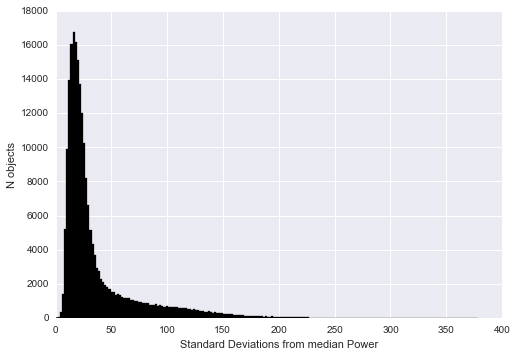

In [11]:
data = np.loadtxt("../../file2", usecols=[1,2,3,4])
plt.hist(data[~np.isnan(data[:,3]) & (data[:,3] != 0)][:,3], bins=200, facecolor='k')
plt.ylabel("N objects")
plt.xlabel("Standard Deviations from median Power")

144000 144000
best period at 3757.297 days, 160.62 sigma from the median


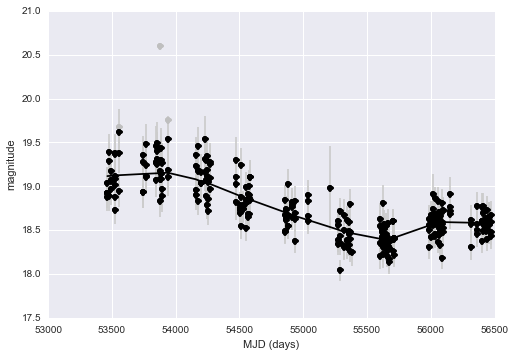

In [12]:
import pyaov

from lightcurve import LightCurve
lc = LightCurve("../../lightcurves/84/1001084016441.dat")
lc.analyze("output.dat")
lc.plotObs()

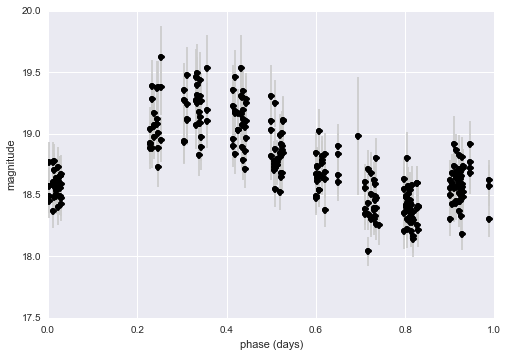

In [3]:
lc.plot_phase(3757.297)

## 4. Simulation

Some example simulated light curves
<img src="./sim_figs/11780650_393546130833978_801561571_n.jpg" style="width: 500px;">
<img src="./sim_figs/11903456_393546137500644_386952302_n.jpg" style="width: 500px;">
<img src="./sim_figs/11911492_393546120833979_1196104598_n.jpg" style="width: 500px;">

Periods range from 300 to 3000
Amplitudes range from from 0.01 to
Magnitudes range from 14 to 20
Number of points range from 50 to 500
Noise and error for the magnitude had a linear dependence of the magnitude itself.
Many values to play with, many approximations

We had 4th dimensional simulated data we wanted to use to get some visualization on how did our method work varying all of them.
Theoretical and practical limitations: Approximations, simulated data growing too quickly.
